In [1]:
%matplotlib inline
import numpy as np
import sklearn.datasets as data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb; sb.set_style( 'darkgrid' ) # use whitegrid if prefer a white background
import pandas as pd
import math

from numpy.random import SeedSequence, default_rng
rng = default_rng( SeedSequence().entropy )

import warnings
warnings.filterwarnings("ignore")

#matplotlib.rcParams.update( { 'font.size': 18 } ) # Use this to setup your preferred font size for plotting

#### 1a- Use a Linear SVM to fit a model on the Iris dataset. Try different train/test partitions and $C$ values and plot the found supporting vectors along with the 0-1 loss error. Also compute how many support vectors are used on a given train/test split to generate the separating hyperplane. 

+ It will be easier to use only two features at a time from the data and in a binary classification context. Also try out different feature and class combinations to see how the model behaves with different feature options. For example: sepal (width vs length) | petal (width vs length ) | sepal width vs petal width | ...
+ Use the supporting vectors to extract the used data from the training set and examine the features (for example, comparing mean values between classes, mean absolute deviance, ... ). Compare also the initial training set with the  extracted data.
+ Recommend using Pandas and Seaborn libraries to to some explorative data plotting

### Iris data

Number of Instances
150 (50 in each of three classes)

Number of Attributes
4 numeric, predictive attributes and the class

Attribute Information
sepal length in cm

sepal width in cm

petal length in cm

petal width in cm

class:
Iris-Setosa

Iris-Versicolour

Iris-Virginica

In [2]:
X, y = data.load_iris( return_X_y = True )


X = X[y != 0, :2] # Sepal width and length columns.
y = y[y != 0]     # Versicolour vs Virginicia

Xdf              = pd.DataFrame( X, columns = [ 'sepal width', 'sepal length' ] )
Xdf[ 'Species' ] = y

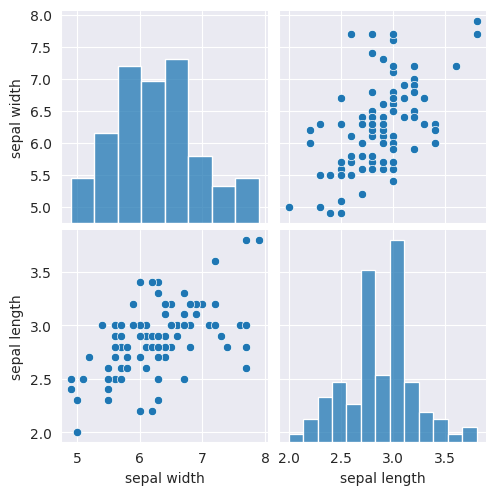

In [3]:
sb.pairplot( data = Xdf[ [ 'sepal width', 'sepal length' ] ] );

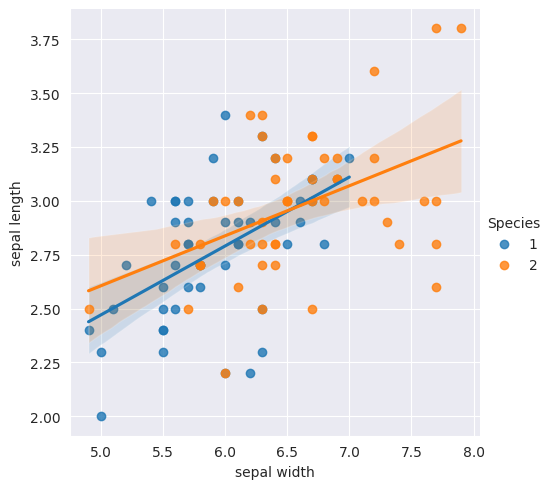

In [4]:
sb.lmplot( data = Xdf, x = 'sepal width', y = 'sepal length', hue = 'Species' );

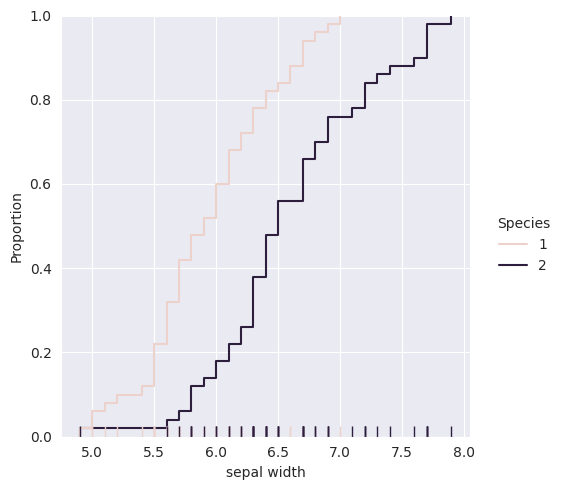

In [5]:
sb.displot( data = Xdf, kind = 'ecdf', x = 'sepal width', hue = 'Species', rug = True );

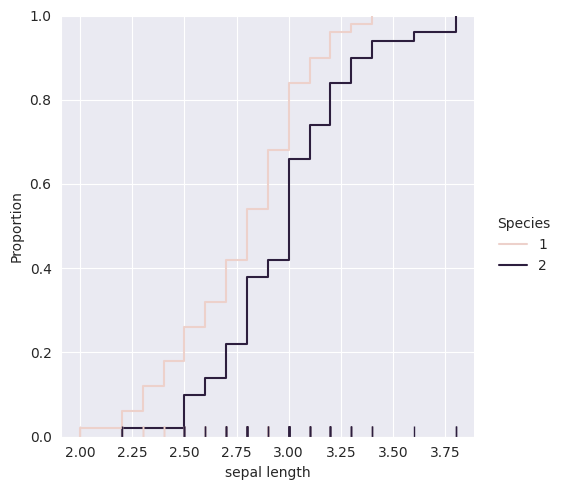

In [6]:
sb.displot( data = Xdf, kind = 'ecdf', x = 'sepal length', hue = 'Species', rug = True );

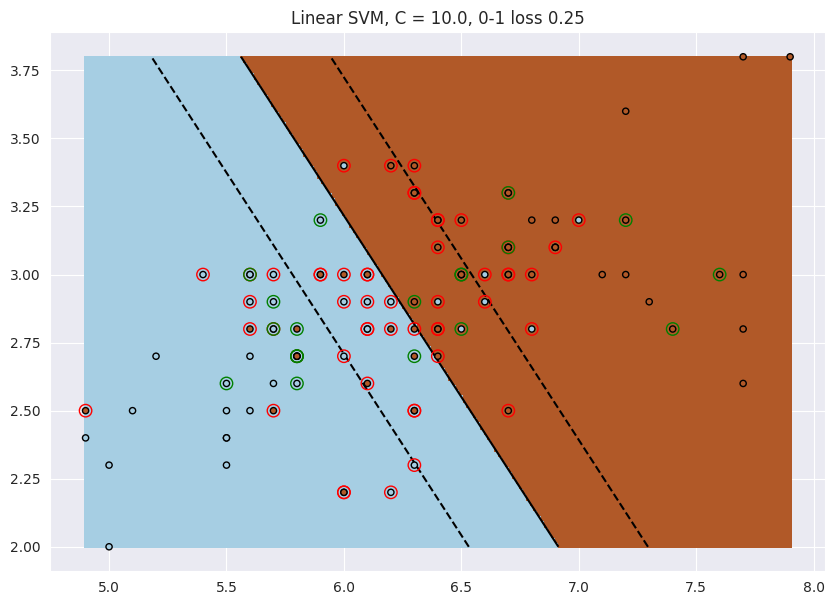

In [7]:
# Adopted from Scikit-Learn examples: 
# https://scikit-learn.org/stable/auto_examples/index.html

from sklearn.svm import SVC # See help( SVC ) for class details
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = rng.integers( 421 ) )

C   = 10.0
clf = SVC( kernel = 'linear', C = C)
clf.fit( X_train, y_train )


plt.figure( figsize = ( 10, 7 ) )
plt.clf()


# Plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='r')
    
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

# Circle out the test data
plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='g')

plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


plt.title( 'Linear SVM, C = {0}, 0-1 loss {1}'.format( C, zero_one_loss( y_test, clf.predict( X_test ) ) ) )
plt.show()


In [8]:
Xsv = X_train[ clf.support_ ]
ysv = y_train[ clf.support_ ]
Xsv = pd.DataFrame( Xsv, columns = [ 'sepal width', 'sepal length' ] )

Xsv[ 'Species' ] = ysv
Xsv.head()

,sepal width,sepal length,Species
0,6.4,3.2,1
1,6.0,2.9,1
2,6.4,2.9,1
3,6.6,2.9,1
4,5.6,2.9,1


In [9]:
Xsv.Species.unique()

array([1, 2])

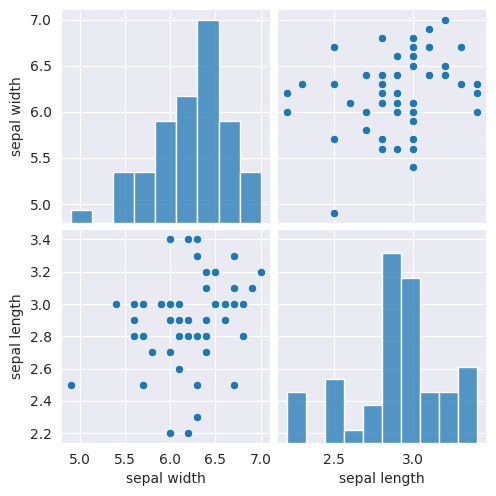

In [11]:
sb.pairplot( data = Xsv[ [ 'sepal width', 'sepal length' ] ] );

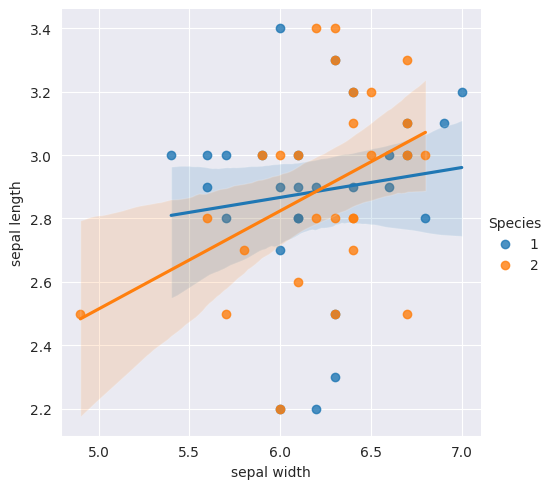

In [12]:
sb.lmplot( data = Xsv, x = 'sepal width', y = 'sepal length', hue = 'Species' );

In [13]:
Xdf.describe()

,sepal width,sepal length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,2.872000,1.500000
std,0.662834,0.332751,0.502519
min,4.900000,2.000000,1.000000
25%,5.800000,2.700000,1.000000
50%,6.300000,2.900000,1.500000
75%,6.700000,3.025000,2.000000
max,7.900000,3.800000,2.000000


In [14]:
Xsv.describe()

,sepal width,sepal length,Species
count,55.000000,55.000000,55.000000
mean,6.218182,2.890909,1.490909
std,0.407836,0.298312,0.504525
min,4.900000,2.200000,1.000000
25%,6.000000,2.800000,1.000000
50%,6.300000,2.900000,1.000000
75%,6.450000,3.050000,2.000000
max,7.000000,3.400000,2.000000


#### 1b - Repeat the same as above but this time using the Multi-layered perceptron, using a regression-based loss function. Compare the training sets covariance matrices with respect to the output of the loss function. Use different train-test set splits and see how the covariance matrix behaves.

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

Xs = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( Xs, y, test_size = 0.2, random_state = rng.integers( 421 ) )

mlp = MLPRegressor( hidden_layer_sizes=(10, 10, 10 ) )
mlp.fit( X_train, y_train )

print( zero_one_loss( y_test, clf.predict( X_test ) ) )

0.5


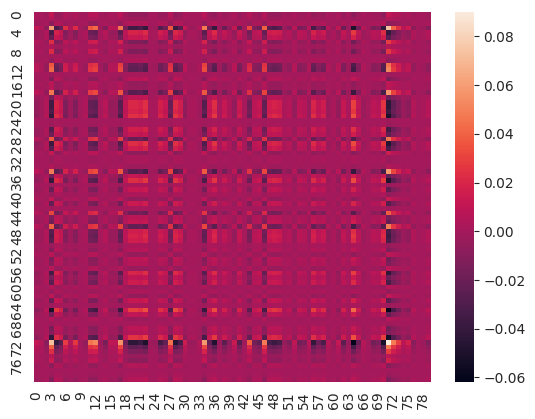

In [22]:
cov  = np.cov(X_train, bias=True)
sb.heatmap(cov)
plt.show()


#### 2- Interpolate a sine function with a 3rd degree polynomial using Backpropagation.  That is, Interpolate the function $f(x) = sin(x)$ where $x\in[-\pi,\pi]$

+ For each polynomial coefficient $W_k$, setup a random weight
+ Forward pass compute the desired polynomial coefficient estimats $\hat{y} = W_0 + W_1x_1 + W_2 x_2 + W_3 x_3$, for example
+ Backward pass, compute the change 2 * ($\hat{y} - y$), and update the coefficients $W_k$
+ Update weights by adjustig with $W_k = W_k - learning rate * W_k$
+ Experiment with different learning rates and number of iterations

In [ ]:
k = 1000
X = np.linspace( -math.pi, math.pi, k )
y = np.sin( X )

W0 = np.random.randn()
W1 = np.random.randn()
W2 = np.random.randn()
W3 = np.random.randn()

In [ ]:
lr = 1e-6 # learning rate, that is in what increments (or jumps) the search is done along the data

T = 2000 # Number of BP iterations
for i in range( T ):
    
    # Forward pass
    yhat = W0 + W1*X + W2*X**2 + W3*X**3
    
    loss = np.square( yhat - y ).sum()
    #if t % 100 == 99: print( t, loss )
        
    # Backward pass
    d_yhat = 2.0 * ( yhat - y )
    d_W0   = d_yhat.sum()
    d_W1   = ( d_yhat * X ).sum()
    d_W2   = ( d_yhat * X ** 2 ).sum()
    d_W3   = ( d_yhat * X ** 3).sum()
    
    # Update network weights
    W0 -= lr * d_W0
    W1 -= lr * d_W1
    W2 -= lr * d_W2
    W3 -= lr * d_W3
    
print()
print(f'Result: yhat = {W0} + {W1} x + {W2} x^2 + {W3} x^3')

#### 2- Use A Neural Network to model digital images. Use different layer sizes, activation functions, and regularizations and examine how these affect the resulting weights and train & test scores. What reveals more structure in the weights? Feel free to vary anyother settings in the model. 
+ Bonus: Experiment how adding Gaussian and Laplacian noise affects the regularization and structures of the gradients in the layers.
  + np.random.laplace, np.random.normal

In [ ]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier # Use help( MLPClassifier )


Xmnist, Ymnist = data.fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
noise_lap = np.random.laplace( 0, 1, Xmnist.shape )
Xmnist = Xmnist + noise_lap
Xminst = Xmnist / 255.
mlp = MLPClassifier( hidden_layer_sizes = (10,), activation = 'relu', max_iter = 15 )

X_train, X_test, y_train, y_test = train_test_split( Xmnist, Ymnist, test_size=0.1, random_state= rng.integers( 521 ) )

# This is for catching and ignoring if fitting produces an convergence issue.
# Comment away if you want verbose warnings.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)
    
print( "Training score: {0}".format( mlp.score( X_train, y_train ) ) )
print( "Test score: {0}".format( mlp.score(X_test, y_test ) ) )

fig, axes = plt.subplots(4, 4, figsize = ( 10, 7 ) )
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#### 3- Experiment the effects of regularization on Neural Networks using different learning rates, number of iterations, number of hidden layers and neurons, and activiation functions. Use the datasets provided and compare convergence rates with the statistics observed in the datasets.

Example and code adopted from Scikit-learn's Neural Network example.

In [ ]:
# Load data

iris = data.load_iris()
X_digits, y_digits = data.load_digits(return_X_y=True)
data_sets = [ (iris.data, iris.target), (X_digits, y_digits),
              data.make_circles(noise=0.2, factor=0.5, random_state=1),
              data.make_moons(noise=0.3, random_state=0),
            ]

In [ ]:
#import warnings

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
#from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]

In [ ]:
def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X) # Try also without variable scaling
    mlps = []
    
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier( random_state=0, hidden_layer_sizes= ( 20, 20, 15 ), activation = 'logistic',
                             max_iter= 300 , **param) # Change 

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits", "circles", "moons"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()